In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',as_frame=False)

In [2]:
X,y = mnist.data,mnist.target

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

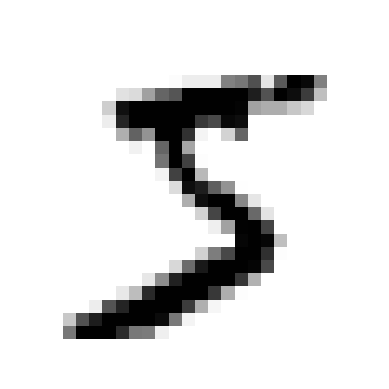

In [7]:
import matplotlib.pyplot as plt

def plot_digit(some_digit):
    image = some_digit.reshape(28,28)
    plt.imshow(image,cmap = 'binary')
    plt.axis('off')

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [8]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [9]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [11]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [12]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [14]:
sgd_classifier.predict([some_digit])

array([ True])

In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier,X_train,y_train_5,cv = 3,scoring='accuracy',n_jobs=-1)

array([0.95035, 0.96035, 0.9604 ])

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_classifier,X_train,y_train_5,cv = 3,n_jobs=-1)

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [18]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [19]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [20]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343847

In [ ]:
X_train

(60000, 784)

In [ ]:
X_test

(10000, 784)

In [25]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [26]:
y_test

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [27]:
y_scores = sgd_classifier.decision_function([some_digit])
y_scores

array([2164.22030239])

In [28]:
## assuming threshold to be 0
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [30]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

## this confirms raising the threshold decreases recall and vice versa

array([False])

In [32]:
y_decision_scores = cross_val_predict(sgd_classifier,X_train,y_train_5,cv = 3,method = 'decision_function',n_jobs=-1)
y_decision_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [33]:
from sklearn.metrics import precision_recall_curve

precisions, recall, threshold = precision_recall_curve(y_train_5,y_decision_scores)

precisions,recall,threshold

(array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
          38871.26391927,   42216.05562787,   49441.43765905]))

In [40]:
min(threshold)

-146348.56726173856

In [41]:
max(threshold)

49441.43765904775

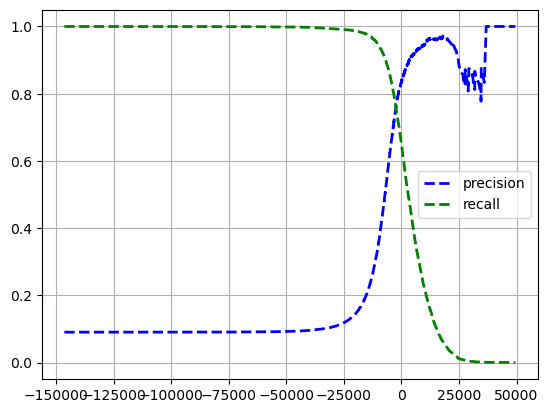

In [ ]:
plt.plot(threshold,precisions[:-1],'b--',label = 'precision',linewidth = 2) # b -- means blue dotted line with ------
plt.plot(threshold,recall[:-1],'g--',label = 'recall',linewidth = 2) # g-- means green dotted line with ----
plt.grid()
plt.legend()
plt.show()

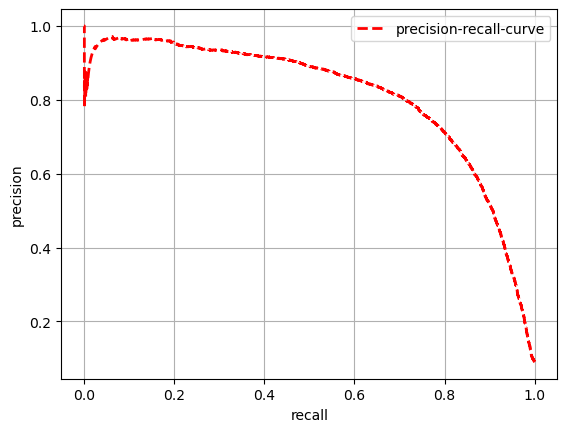

In [60]:
plt.plot(recall,precisions,'r--',linewidth = 2,label = 'precision-recall-curve')
plt.grid()
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend()

plt.show()

In [69]:
idx_for_90_precision = (precisions >= 0.90).argmax()
idx_for_90_precision

threshold_for_90_precision = threshold[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [78]:
y_train_pred_90 = (y_decision_scores >= threshold_for_90_precision)

In [79]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [72]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [82]:
recall_at_90_precision = recall_score(y_train_5,y_train_pred_90)
recall_at_90_precision

0.4799852425751706

In [83]:
from sklearn.metrics import roc_curve # receiver operating characterstics 

fpr,tpr,threshold = roc_curve(y_train_5,y_decision_scores)
fpr,tpr,threshold

(array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
        1.        ]),
 array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00]),
 array([             inf,   49441.43765905,   36801.60697028, ...,
        -105763.22240074, -106527.45300471, -146348.56726174]))

In [84]:
idx_for_threshold_at_90 = (threshold <= threshold_for_90_precision).argmax()
tpr_90,fpr_90 = tpr[idx_for_threshold_at_90],fpr[idx_for_threshold_at_90]
tpr_90,fpr_90

(0.4799852425751706, 0.005295076861063779)

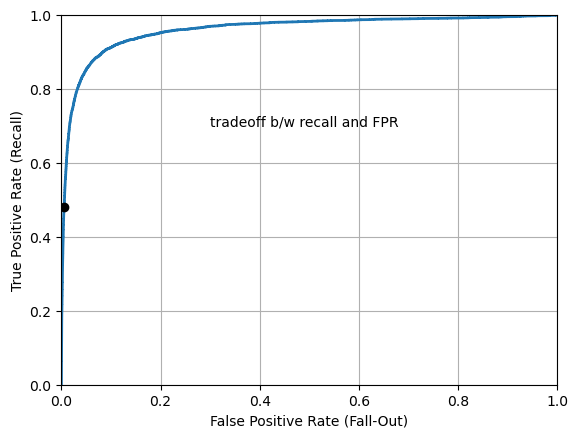

In [94]:
plt.plot(fpr,tpr,linewidth = 2,label = 'ROC curve')
plt.plot([fpr_90],[tpr_90],'ko',label = 'threshold for 90% precision')

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.text(x = 0.3,y = 0.7,s = 'tradeoff b/w recall and FPR')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score # area under the curve(AUC) , 1 is perfect 0.5 is of purely random classifier

roc_auc_score(y_train_5,y_decision_scores)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42) # note that it doesn't have a decision function but instead a predict_proba method

In [98]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv = 3,method = 'predict_proba',n_jobs=-1)
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [ ]:
y_probas_forest[:2] # 0.11 propbaility of negative and 0.89 probability for positive 

array([[0.11, 0.89],
       [0.99, 0.01]])

In [100]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest,recall_forest,threshold_forest = precision_recall_curve(y_train_5,y_scores_forest)

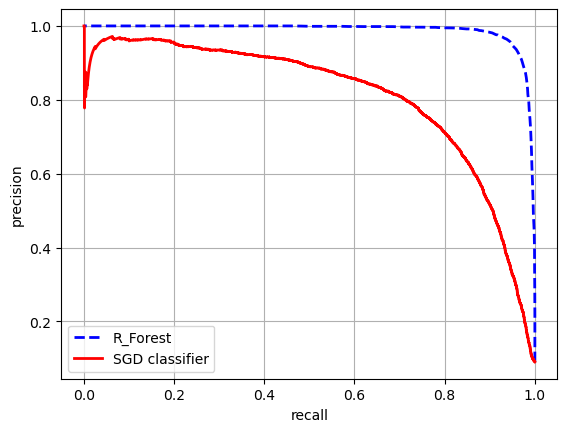

In [102]:
plt.plot(recall_forest,precisions_forest,'b--',linewidth = 2,label = 'R_Forest')
plt.plot(recall,precisions,'r-',linewidth = 2,label = 'SGD classifier')

plt.xlabel('recall')
plt.ylabel('precision')
plt.grid([0,1,0,1])
plt.legend()

plt.show()

In [103]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.5

In [105]:
f1_score(y_train_5,y_train_pred_forest)

0.9274509803921569

In [107]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [108]:
precision_score(y_train_5,y_train_pred_forest)

0.9897468089558485

In [110]:
recall_score(y_train_5,y_train_pred_forest)

0.8725327430363402

In [111]:
# scikit-learn automatically detects what stratergy we are using O V O or O V E

In [112]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000],y_train[:2000])

SVC(random_state=42)

In [113]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [116]:
svm_clf.decision_function([some_digit]).round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [120]:
class_id = svm_clf.decision_function([some_digit]).round(2).argmax()
class_id

5

In [121]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [122]:
svm_clf.classes_[class_id]

'5'

In [132]:
sgd_clf = SGDClassifier(random_state=42,n_jobs=-1)
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [134]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [135]:
cross_val_score(sgd_clf,X_train,y_train,cv = 3, scoring = 'accuracy',n_jobs=-1)

array([0.87365, 0.85835, 0.8689 ])

In [136]:
# scaling the input may increase accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))

In [138]:
cross_val_score(sgd_clf,X_train_scaled,y_train,cv = 3, scoring = 'accuracy',n_jobs=-1)

array([0.8983, 0.891 , 0.9018])

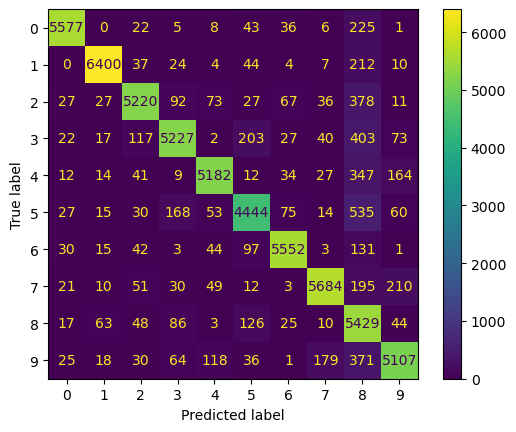

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv = 3, n_jobs=-1)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

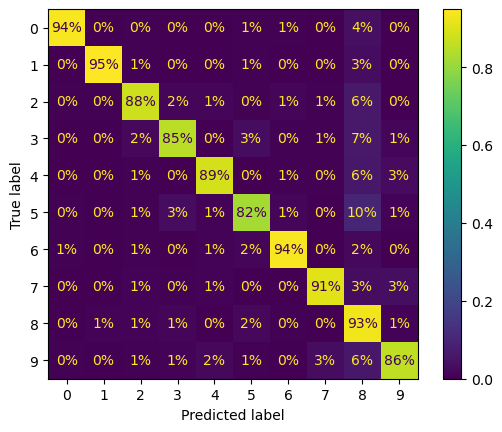

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='true',values_format='.0%')

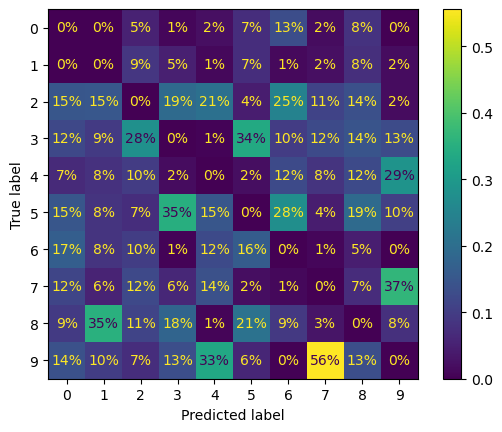

In [143]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='pred',values_format='.0%',sample_weight=sample_weight)

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd] # Concatenates on the column axis np.r_ is used for along the row axis

In [162]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [163]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [170]:
# Multi-output classification

np.random.seed(42)
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise

In [ ]:
y_train_mod = X_train
y_test_mod = X_test
# DOne

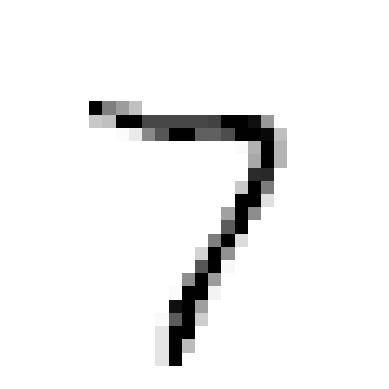

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit) # Cleaned Digit
plt.show()